<a href="https://www.kaggle.com/code/lrntszab/fruit-classification-with-pytorch?scriptVersionId=170871439" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Remove done from the dir names

In [1]:
import shutil

source_dir = '/kaggle/input/fruits-dataset-for-classification'
destination_dir = '/kaggle/working/fruits-dataset-for-classification'

shutil.copytree(source_dir, destination_dir)

'/kaggle/working/fruits-dataset-for-classification'

In [2]:
import os

base_dir = '/kaggle/working/fruits-dataset-for-classification'
for dir in os.listdir(base_dir):
    new_name = dir.rsplit('_', 1)[0]
    old_path = os.path.join(base_dir, dir)
    new_path = os.path.join(base_dir, new_name)
    os.rename(old_path, new_path)

# Class Distribution

In [3]:
data_path = '/kaggle/working/fruits-dataset-for-classification'
class_counts= {}

for class_label in os.listdir(data_path):
    class_path = os.path.join(data_path, class_label)
    number_of_images = len(os.listdir(class_path))
    class_counts[class_label] = number_of_images
    
for class_name, counts in class_counts.items():
    print(f"Class: {class_name}, Number of images: {counts}\n")

Class: rotten_strawberries, Number of images: 251

Class: rotten_pomegranates, Number of images: 250

Class: rotten_peaches, Number of images: 343

Class: fresh_peaches, Number of images: 250

Class: fresh_pomegranates, Number of images: 311

Class: fresh_strawberries, Number of images: 250



**Plot the class distribution**

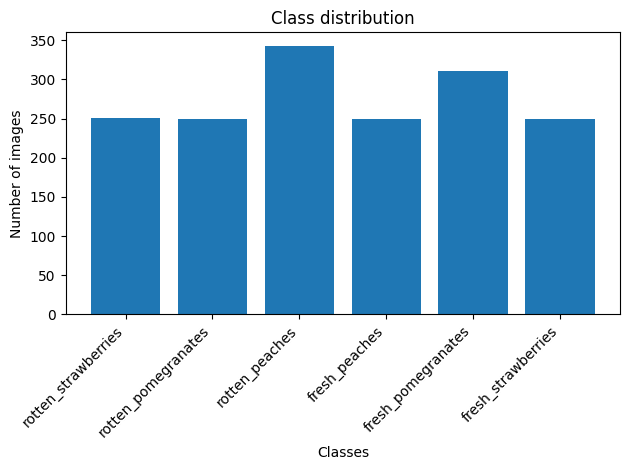

In [4]:
import matplotlib.pyplot as plt

plt.bar(class_counts.keys(), class_counts.values())
plt.xlabel('Classes')
plt.ylabel('Number of images')
plt.title('Class distribution')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# Class visualization

In [5]:
dict_for_five_item_in_each_class ={}

data_path = '/kaggle/working/fruits-dataset-for-classification'
for class_label in os.listdir(data_path):
    class_path = os.path.join(data_path, class_label)
    items_paths = []
    for idx, item in enumerate(os.listdir(class_path)):
        if idx < 5:
            items_paths.append(os.path.join(class_path, item))
    dict_for_five_item_in_each_class[class_label] = items_paths
    
print(dict_for_five_item_in_each_class) 

{'rotten_strawberries': ['/kaggle/working/fruits-dataset-for-classification/rotten_strawberries/rotten_strawberry_199.jpg', '/kaggle/working/fruits-dataset-for-classification/rotten_strawberries/rotten_strawberry_33.jpg', '/kaggle/working/fruits-dataset-for-classification/rotten_strawberries/rotten_strawberry_22.jpg', '/kaggle/working/fruits-dataset-for-classification/rotten_strawberries/rotten_strawberry_248.jpg', '/kaggle/working/fruits-dataset-for-classification/rotten_strawberries/rotten_strawberry_261.jpg'], 'rotten_pomegranates': ['/kaggle/working/fruits-dataset-for-classification/rotten_pomegranates/rotten_pomegranate_106.jpg', '/kaggle/working/fruits-dataset-for-classification/rotten_pomegranates/rotten_pomegranate_184.jpg', '/kaggle/working/fruits-dataset-for-classification/rotten_pomegranates/rotten_pomegranate_94.jpg', '/kaggle/working/fruits-dataset-for-classification/rotten_pomegranates/rotten_pomegranate_159.jpg', '/kaggle/working/fruits-dataset-for-classification/rotten_

**Plot 5 images from each class for inspection**

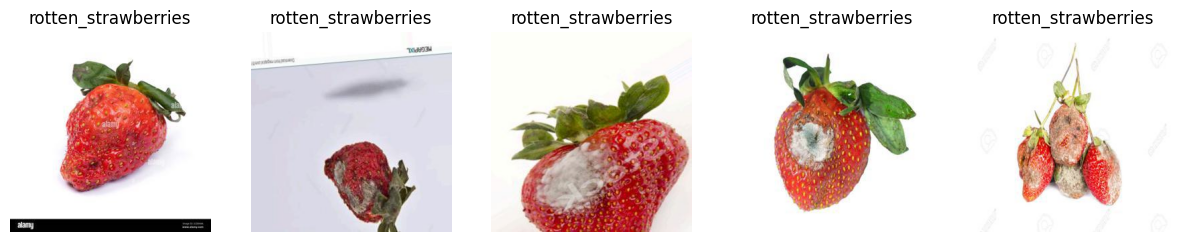

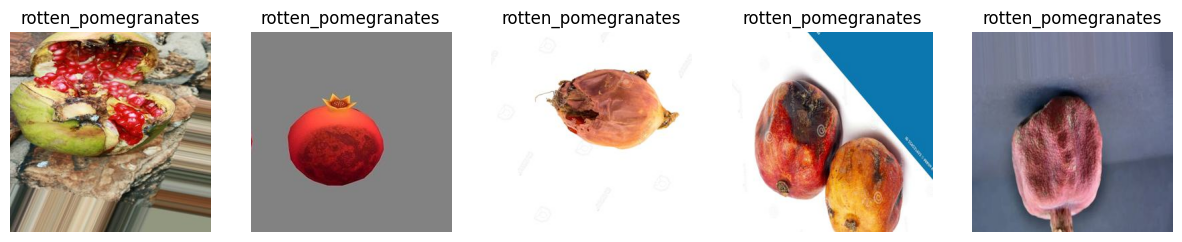

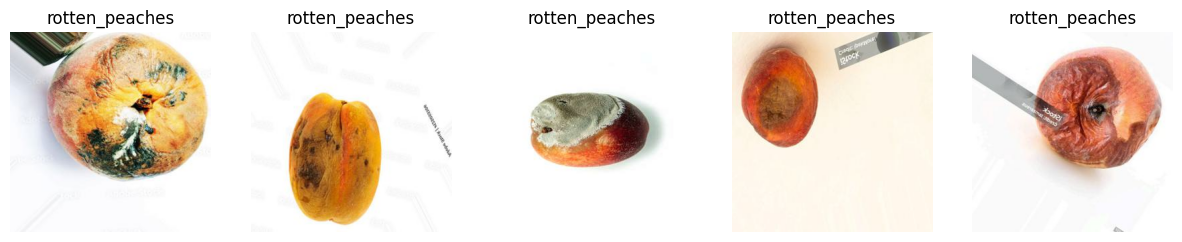

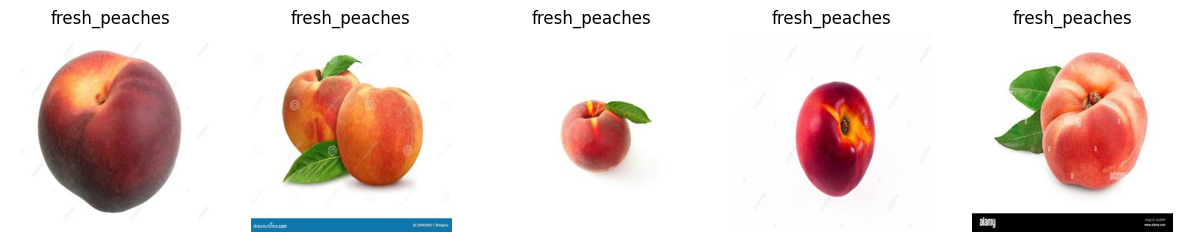

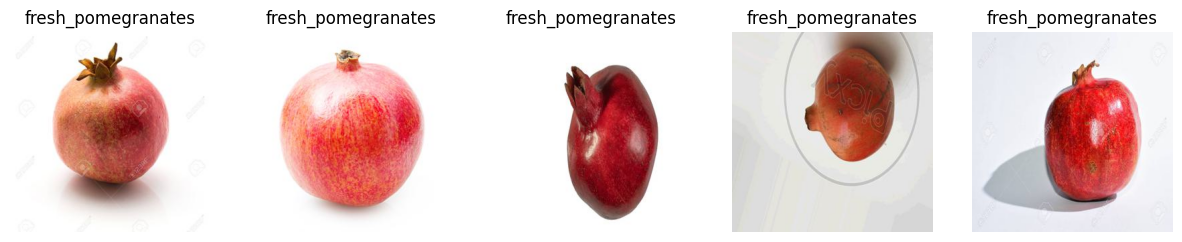

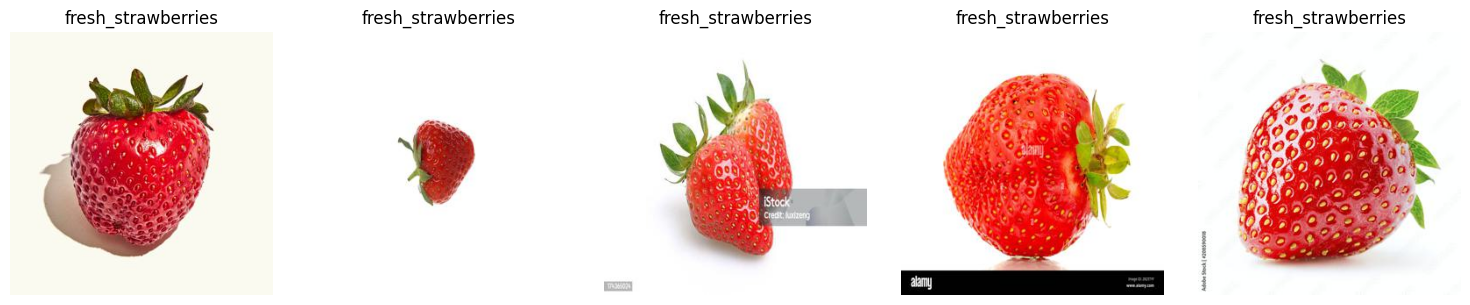

In [6]:
import PIL

for class_labels, image_paths in dict_for_five_item_in_each_class.items():
    plt.figure(figsize=(15, 3))
    for i, image_path in enumerate(image_paths):
        img = PIL.Image.open(image_path)
        plt.subplot(1, len(image_paths), i + 1)
        plt.imshow(img)
        plt.title(class_labels)
        plt.axis('off')
plt.tight_layout() 
plt.show()

# Define config parameters

In [7]:
import torch

DATA_PATH = '/kaggle/working/fruits-dataset-for-classification'
BATCH_SIZE = 16
INPUT_SIZE = 224
NUMBER_OF_CLASSES = 6

NUMBER_OF_EPOCHS = 50
LR = 0.0001
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

In [8]:
# torch.manual_seed(0)

# Load the data

In [9]:
from torchvision import datasets, transforms
from torch.utils.data import random_split, DataLoader



train_transfroms = transforms.Compose([
    transforms.Resize((INPUT_SIZE,INPUT_SIZE)),
    transforms.RandomVerticalFlip(),
    transforms.RandomHorizontalFlip(),
#     transforms.GaussianBlur(),
    transforms.RandomRotation(degrees=30),
    transforms.ToTensor(),
])

# test_transforms = transforms.Compose([
#     transforms.Resize((config.INPUT_SIZE, config.INPUT_SIZE)),
#     transforms.ToTensor()
# ])


def get_dataloaders():
    
    torch.manual_seed(1)

    full_dataset = datasets.ImageFolder(DATA_PATH, transform=train_transfroms)
    class_labels = os.listdir(DATA_PATH)
    class_labels.sort()

    val_test_size = int(0.3 * len(full_dataset))
    train_size = len(full_dataset) - val_test_size

    train_dataset, val_test_dataset = random_split(full_dataset, [train_size, val_test_size])

    test_size = int(0.3 * len(val_test_dataset))
    val_size = len(val_test_dataset) - test_size

    val_dataset, test_dataset = random_split(val_test_dataset, [val_size, test_size])

    print(f'Train size: {len(train_dataset)}')
    print(f'Val size: {len(val_dataset)}')
    print(f'Test size: {len(test_dataset)}')

    train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)
    val_dataloader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)
    test_dataloader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2)

    return train_dataloader, val_dataloader, test_dataloader, class_labels

# Model saving and loading

In [10]:
def save_model(save_directory, model,  number_of_epochs, additional_text='', augmentation=''):
    os.makedirs(save_directory, exist_ok=True)
    model_name = model.__class__.__name__

    torch.save(model.state_dict(), os.path.join(save_directory, f"{model_name}{additional_text}_model_epochs_{number_of_epochs}{augmentation}.pth"))


def load_model(load_directory, model, number_of_epochs, additional_text='', augmentation=''):
    model_name = model.__class__.__name__

    model.load_state_dict(torch.load(os.path.join(load_directory, f"{model_name}{additional_text}_model_epochs_{number_of_epochs}{augmentation}.pth"), map_location=torch.device('cpu')))

# Create the custom model

In [11]:
import torch.nn as nn


class CNNForFruits(nn.Module):
    def __init__(self,number_of_classes):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 4, kernel_size=3)
        # 4*126*126
        # 4*222*222
        self.bn1 = nn.BatchNorm2d(4)
        self.relu = nn.ReLU()
        self.pooling = nn.MaxPool2d(2, 2)
        # 4*63*63
        # 4*111*111
        self.conv2 = nn.Conv2d(4, 8, kernel_size=3)
        self.bn2 = nn.BatchNorm2d(8)
        # 8*61*61
        # 8*30.5*30.5
        # 8*109*109
        # 8*54.5*54.5
        self.conv3 = nn.Conv2d(8, 16, kernel_size=3)
        self.bn3 = nn.BatchNorm2d(16)
        # 16*28*28
        # 16*14*14
        # 16*52*52
        # 16*26*26

        self.fc1 = nn.Linear(16*26*26, 1200)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(1200, number_of_classes)

    def forward(self, x):
        x = self.pooling(self.relu(self.bn1(self.conv1(x))))
        x = self.pooling(self.relu(self.bn2(self.conv2(x))))
        x = self.pooling(self.relu(self.bn3(self.conv3(x))))
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.dropout(x)
        x = self.fc2(x)

        return x



# Training

In [12]:
import os
import torch
import torch.optim as optim
import matplotlib.pyplot as plt
from tqdm import tqdm
import torch.backends.cudnn as cudnn
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torch.cuda.amp import autocast, GradScaler


def plot_and_save_training_results(data, label, num_epochs, save_path):
    plt.plot(range(1, num_epochs + 1), data['train'], label='train')
    plt.plot(range(1, num_epochs + 1), data['val'], label='validation')
    plt.title(f'Training and validation {label}')
    plt.xlabel('epoch')
    plt.ylabel(label)
    plt.legend()

    plt.savefig(os.path.join(save_path, f"{label}.png"))
    plt.close()

    print(f"Training graph saved to {save_path}")


def train_val_step(dataloader, model, loss_function, optimizer, device, scaler=None):
    if optimizer is not None:
        model.train()
    else:
        model.eval()

    running_loss = 0
    correct = 0
    total = 0

    for data in dataloader:
        image, labels = data
        image, labels = image.to(device), labels.to(device)
        # Uncomment it when you use BCEWithLogitsLoss() criterion
        # labels = labels.unsqueeze(1).float()

        with autocast():
            outputs = model(image)
            loss = loss_function(outputs, labels)

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        if optimizer is not None:
            optimizer.zero_grad()
            scaler.scale(loss).backward()
            scaler.step(optimizer)
            scaler.update()

        running_loss += loss.item()

    return running_loss / len(dataloader.dataset), correct / total


def train(model, train_loader, val_loader, device, num_epochs=5, additional_text='', augmentation=''):

    graphs_and_logs_save_directory = './training_graphs_and_logs'
    model_name = model.__class__.__name__
    graphs_and_logs_save_path = os.path.join(graphs_and_logs_save_directory, f"{model_name}_epochs_{num_epochs}")

    # define criterion and optimizer for training
    criterion = torch.nn.CrossEntropyLoss()
    # criterion = nn.BCEWithLogitsLoss()

    # model = nn.DataParallel(model).to(device)
    model.to(device)

    optimizer = optim.SGD(model.parameters(), lr=LR, momentum=0.9, weight_decay=0.001)

    scheduler = ReduceLROnPlateau(optimizer, threshold=0.01, factor=0.1, patience=3, min_lr=1e-6, verbose=True)

    scaler = GradScaler()

    accuracy_tracking = {'train': [], 'val': []}
    loss_tracking = {'train': [], 'val': []}
    best_loss = float('inf')
    num_of_actual_epochs = 1

    # Early stopping
    early_stopping = False
    patience = 5
    min_delta = 0.00001
    current_patience = 0

    os.makedirs(graphs_and_logs_save_path, exist_ok=True)

    log_file_path = os.path.join(graphs_and_logs_save_path, 'log.txt')
    log_file = open(log_file_path, 'a')

    # we iterate for the specified number of epochs
    for epoch in tqdm(range(num_epochs), desc="Epochs", unit="epoch"):
        training_loss, training_accuracy = train_val_step(train_loader, model, criterion, optimizer, device, scaler)
        loss_tracking['train'].append(training_loss)
        accuracy_tracking['train'].append(training_accuracy)

        with torch.inference_mode():
            val_loss, val_accuracy = train_val_step(val_loader, model, criterion, None, device)
            loss_tracking['val'].append(val_loss)
            accuracy_tracking['val'].append(val_accuracy)
            if val_loss < best_loss - min_delta:
                best_loss = val_loss
                current_patience = 0

                # Save the model when a new best loss is found
                print('Saving best model')
                save_model('./trained_models', model, num_epochs, additional_text=additional_text,
                           augmentation=augmentation)
            else:
                current_patience += 1

                # Early stopping
            if current_patience >= patience:
                print('Early stopping triggered.')
                early_stopping = True
                break

            scheduler.step(val_loss)

        print(f'Training accuracy: {training_accuracy:.6}, Validation accuracy: {val_accuracy:.6}')
        print(f'Training loss: {training_loss:.6}, Validation loss: {val_loss:.6}')

        # Append the information to the log file
        log_file.write(f"Epoch {epoch + 1}: "
                       f'Training accuracy: {training_accuracy:.6}, Validation accuracy: {val_accuracy:.6}, '
                       f'Training loss: {training_loss:.6}, Validation loss: {val_loss:.6}\n')

        num_of_actual_epochs += 1

    print('\nFinished Training\n')
    
    if early_stopping:
        plot_and_save_training_results(loss_tracking, 'loss', num_of_actual_epochs, graphs_and_logs_save_path)
        plot_and_save_training_results(accuracy_tracking, 'accuracy', num_of_actual_epochs, graphs_and_logs_save_path)
    else:
        plot_and_save_training_results(loss_tracking, 'loss', num_epochs, graphs_and_logs_save_path)
        plot_and_save_training_results(accuracy_tracking, 'accuracy', num_epochs, graphs_and_logs_save_path)
    log_file.close()


if __name__ == "__main__":
    model = CNNForFruits(NUMBER_OF_CLASSES)

    train_loader, val_loader, _, _ = get_dataloaders()
    train(model, train_loader, val_loader, DEVICE, num_epochs=NUMBER_OF_EPOCHS, augmentation='aug')

Train size: 1159
Val size: 348
Test size: 148


Epochs:   2%|▏         | 1/50 [00:04<03:28,  4.25s/epoch]

Saving best model
Training accuracy: 0.255393, Validation accuracy: 0.350575
Training loss: 0.109826, Validation loss: 0.0992183


Epochs:   4%|▍         | 2/50 [00:07<02:51,  3.57s/epoch]

Saving best model
Training accuracy: 0.451251, Validation accuracy: 0.534483
Training loss: 0.0911447, Validation loss: 0.0831206


Epochs:   6%|▌         | 3/50 [00:10<02:38,  3.37s/epoch]

Saving best model
Training accuracy: 0.52459, Validation accuracy: 0.551724
Training loss: 0.0811016, Validation loss: 0.0776678


Epochs:   8%|▊         | 4/50 [00:13<02:29,  3.25s/epoch]

Saving best model
Training accuracy: 0.559965, Validation accuracy: 0.58046
Training loss: 0.0758462, Validation loss: 0.0743068


Epochs:  10%|█         | 5/50 [00:16<02:25,  3.23s/epoch]

Saving best model
Training accuracy: 0.559103, Validation accuracy: 0.560345
Training loss: 0.0738254, Validation loss: 0.0730731


Epochs:  12%|█▏        | 6/50 [00:19<02:20,  3.19s/epoch]

Saving best model
Training accuracy: 0.586713, Validation accuracy: 0.600575
Training loss: 0.0710949, Validation loss: 0.0685527


Epochs:  14%|█▍        | 7/50 [00:22<02:14,  3.13s/epoch]

Saving best model
Training accuracy: 0.597066, Validation accuracy: 0.603448
Training loss: 0.0687832, Validation loss: 0.0675734


Epochs:  16%|█▌        | 8/50 [00:26<02:15,  3.23s/epoch]

Saving best model
Training accuracy: 0.603106, Validation accuracy: 0.606322
Training loss: 0.0674333, Validation loss: 0.0652576


Epochs:  18%|█▊        | 9/50 [00:29<02:10,  3.17s/epoch]

Saving best model
Training accuracy: 0.610871, Validation accuracy: 0.614943
Training loss: 0.0662338, Validation loss: 0.0647271


Epochs:  20%|██        | 10/50 [00:32<02:04,  3.12s/epoch]

Saving best model
Training accuracy: 0.641933, Validation accuracy: 0.632184
Training loss: 0.0631262, Validation loss: 0.0615849


Epochs:  22%|██▏       | 11/50 [00:35<02:02,  3.14s/epoch]

Saving best model
Training accuracy: 0.642796, Validation accuracy: 0.640805
Training loss: 0.0624525, Validation loss: 0.0607372


Epochs:  24%|██▍       | 12/50 [00:38<01:58,  3.11s/epoch]

Saving best model
Training accuracy: 0.634167, Validation accuracy: 0.626437
Training loss: 0.0622141, Validation loss: 0.0604277


Epochs:  26%|██▌       | 13/50 [00:41<01:54,  3.09s/epoch]

Saving best model
Training accuracy: 0.645384, Validation accuracy: 0.658046
Training loss: 0.0618788, Validation loss: 0.0599597


Epochs:  28%|██▊       | 14/50 [00:44<01:52,  3.12s/epoch]

Saving best model
Training accuracy: 0.683348, Validation accuracy: 0.652299
Training loss: 0.0585004, Validation loss: 0.05861


Epochs:  30%|███       | 15/50 [00:47<01:47,  3.07s/epoch]

Training accuracy: 0.66264, Validation accuracy: 0.637931
Training loss: 0.0590883, Validation loss: 0.0591185


Epochs:  32%|███▏      | 16/50 [00:50<01:43,  3.05s/epoch]

Training accuracy: 0.650561, Validation accuracy: 0.612069
Training loss: 0.0583971, Validation loss: 0.0587185


Epochs:  34%|███▍      | 17/50 [00:53<01:41,  3.08s/epoch]

Saving best model
Training accuracy: 0.687662, Validation accuracy: 0.643678
Training loss: 0.0549849, Validation loss: 0.0583691


Epochs:  36%|███▌      | 18/50 [00:57<01:39,  3.12s/epoch]

Saving best model
Training accuracy: 0.670406, Validation accuracy: 0.655172
Training loss: 0.0561853, Validation loss: 0.0559567


Epochs:  38%|███▊      | 19/50 [01:00<01:38,  3.17s/epoch]

Saving best model
Training accuracy: 0.691113, Validation accuracy: 0.666667
Training loss: 0.054019, Validation loss: 0.0541242


Epochs:  40%|████      | 20/50 [01:03<01:33,  3.12s/epoch]

Training accuracy: 0.685936, Validation accuracy: 0.666667
Training loss: 0.0546101, Validation loss: 0.0551966


Epochs:  42%|████▏     | 21/50 [01:06<01:29,  3.10s/epoch]

Saving best model
Training accuracy: 0.69025, Validation accuracy: 0.666667
Training loss: 0.0532204, Validation loss: 0.0540355


Epochs:  44%|████▍     | 22/50 [01:09<01:25,  3.05s/epoch]

Training accuracy: 0.675582, Validation accuracy: 0.649425
Training loss: 0.0547797, Validation loss: 0.0541622
Saving best model


Epochs:  46%|████▌     | 23/50 [01:12<01:22,  3.07s/epoch]

Training accuracy: 0.672994, Validation accuracy: 0.663793
Training loss: 0.055084, Validation loss: 0.0534661


Epochs:  48%|████▊     | 24/50 [01:15<01:20,  3.08s/epoch]

Saving best model
Training accuracy: 0.693701, Validation accuracy: 0.672414
Training loss: 0.0524849, Validation loss: 0.0527765


Epochs:  50%|█████     | 25/50 [01:18<01:15,  3.04s/epoch]

Training accuracy: 0.689387, Validation accuracy: 0.672414
Training loss: 0.0512973, Validation loss: 0.0532482


Epochs:  52%|█████▏    | 26/50 [01:21<01:11,  2.99s/epoch]

Training accuracy: 0.689387, Validation accuracy: 0.678161
Training loss: 0.0533066, Validation loss: 0.0530065


Epochs:  54%|█████▍    | 27/50 [01:24<01:08,  2.99s/epoch]

Training accuracy: 0.709232, Validation accuracy: 0.652299
Training loss: 0.0501146, Validation loss: 0.0551149


Epochs:  56%|█████▌    | 28/50 [01:27<01:06,  3.03s/epoch]

Saving best model
Training accuracy: 0.710095, Validation accuracy: 0.666667
Training loss: 0.0502273, Validation loss: 0.0508458


Epochs:  58%|█████▊    | 29/50 [01:30<01:04,  3.06s/epoch]

Training accuracy: 0.715272, Validation accuracy: 0.692529
Training loss: 0.0501317, Validation loss: 0.0509745


Epochs:  60%|██████    | 30/50 [01:33<01:00,  3.01s/epoch]

Training accuracy: 0.713546, Validation accuracy: 0.675287
Training loss: 0.0491, Validation loss: 0.0517517


Epochs:  62%|██████▏   | 31/50 [01:36<00:57,  3.00s/epoch]

Training accuracy: 0.713546, Validation accuracy: 0.635057
Training loss: 0.0489251, Validation loss: 0.0528306


Epochs:  64%|██████▍   | 32/50 [01:39<00:53,  2.99s/epoch]

Epoch 00032: reducing learning rate of group 0 to 1.0000e-05.
Training accuracy: 0.716997, Validation accuracy: 0.689655
Training loss: 0.049353, Validation loss: 0.051716


Epochs:  66%|██████▌   | 33/50 [01:42<00:51,  3.03s/epoch]

Saving best model
Training accuracy: 0.718723, Validation accuracy: 0.698276
Training loss: 0.0484934, Validation loss: 0.0498695


Epochs:  68%|██████▊   | 34/50 [01:45<00:48,  3.02s/epoch]

Training accuracy: 0.739431, Validation accuracy: 0.681034
Training loss: 0.0465465, Validation loss: 0.0507755


Epochs:  70%|███████   | 35/50 [01:48<00:44,  2.99s/epoch]

Training accuracy: 0.725626, Validation accuracy: 0.701149
Training loss: 0.047452, Validation loss: 0.0505811


Epochs:  72%|███████▏  | 36/50 [01:51<00:41,  2.99s/epoch]

Saving best model
Training accuracy: 0.732528, Validation accuracy: 0.712644
Training loss: 0.0468103, Validation loss: 0.0487743


Epochs:  74%|███████▍  | 37/50 [01:54<00:39,  3.01s/epoch]

Training accuracy: 0.742882, Validation accuracy: 0.681034
Training loss: 0.0462012, Validation loss: 0.0505893


Epochs:  76%|███████▌  | 38/50 [01:57<00:35,  2.97s/epoch]

Training accuracy: 0.734254, Validation accuracy: 0.701149
Training loss: 0.046032, Validation loss: 0.0489138


Epochs:  78%|███████▊  | 39/50 [02:00<00:33,  3.02s/epoch]

Training accuracy: 0.725626, Validation accuracy: 0.712644
Training loss: 0.0468246, Validation loss: 0.0503456


Epochs:  80%|████████  | 40/50 [02:03<00:30,  3.01s/epoch]

Epoch 00040: reducing learning rate of group 0 to 1.0000e-06.
Training accuracy: 0.729077, Validation accuracy: 0.681034
Training loss: 0.0467276, Validation loss: 0.0514287


Epochs:  80%|████████  | 40/50 [02:06<00:31,  3.16s/epoch]

Early stopping triggered.

Finished Training



Training graph saved to ./training_graphs_and_logs/CNNForFruits_epochs_50
Training graph saved to ./training_graphs_and_logs/CNNForFruits_epochs_50


# Training Evaluation

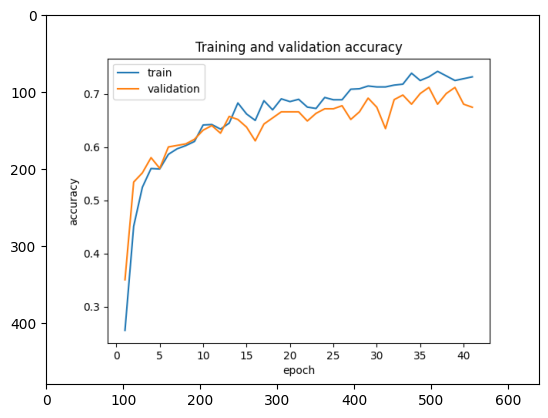

In [13]:
import matplotlib.image as mpimg
img_acc = mpimg.imread('/kaggle/working/training_graphs_and_logs/CNNForFruits_epochs_50/accuracy.png')
imgplot = plt.imshow(img_acc)
plt.show()

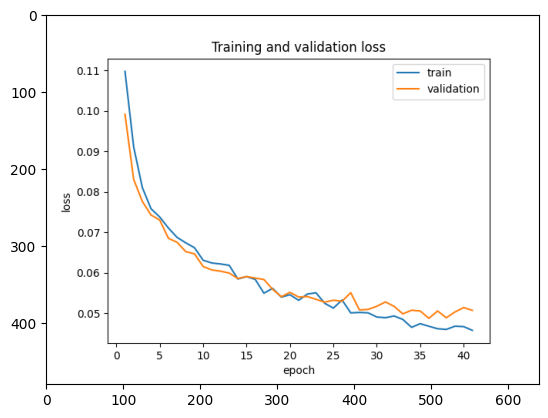

In [14]:
img_loss = mpimg.imread('/kaggle/working/training_graphs_and_logs/CNNForFruits_epochs_50/loss.png')
imgplot = plt.imshow(img_loss)
plt.show()

# Testing

In [15]:
import numpy as np
import random
import seaborn as sns
from torch import nn
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from torchinfo import summary
from sklearn.metrics import confusion_matrix, classification_report

def evaluate(model, num_epochs, test_loader, additional_text='', augmentation='', model_structure=False):

    load_model('./trained_models', model, number_of_epochs=num_epochs, additional_text=additional_text,
               augmentation=augmentation)

    model.eval()
    y_true = []
    y_pred = []

    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)

            y_true.extend(labels.numpy())
            y_pred.extend(predicted.numpy())

    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    print("Evaluation metrics:\n")

    print('Accuracy: {:.2f}%'.format(accuracy * 100))
    # print('Precision: {:.2f}'.format(precision))
    # print('Recall: {:.2f}'.format(recall))
    # print('F1 Score: {:.2f}'.format(f1))

    # print out the number of parameters
    # total_params = sum(p.numel() for p in model.parameters())
    # print(f"Total number of parameters: {total_params}")

    # print out the model structure
    # if model_structure:
    #     summary(model=model,
    #             # (batch_size, color_channels, height, width)
    #             input_size=(64, 3, 32, 32),
    #             col_names=["input_size", "output_size", "num_params"],
    #             col_width=20,
    #             row_settings=["var_names"]
    #     )
        # print(model.eval())

    return y_true, y_pred

if __name__ == "__main__":

    model = CNNForFruits(NUMBER_OF_CLASSES)

    # Init the test-loader
    _, _, test_loader, class_labels = get_dataloaders()

    # determine the evaluation metrics
    true_labels, predictions = evaluate(model, NUMBER_OF_EPOCHS, test_loader, augmentation='aug', model_structure=True)

Train size: 1159
Val size: 348
Test size: 148
Evaluation metrics:

Accuracy: 70.95%


**Create confusion matrix**

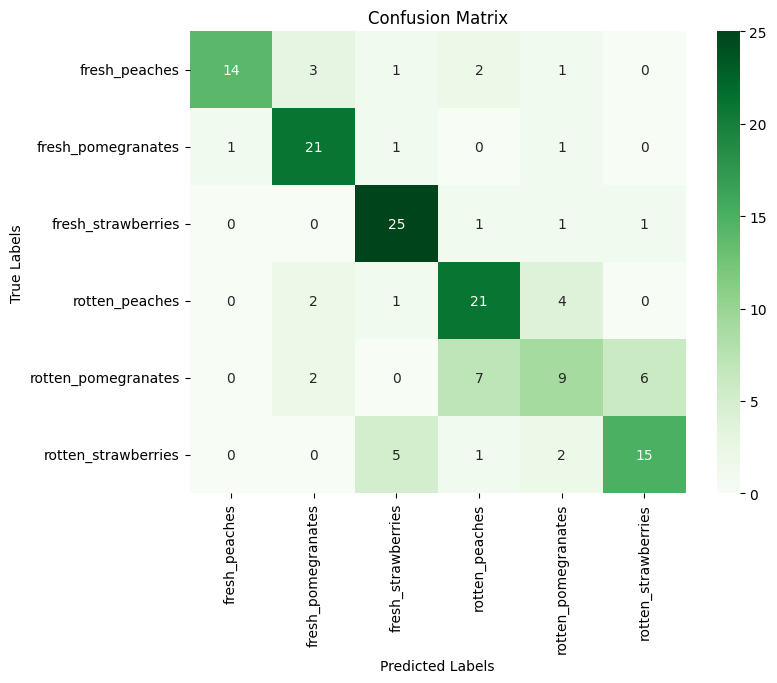

In [16]:
# Create the confusion matrix
cm = confusion_matrix(true_labels, predictions)
# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

**Create classification report**

In [17]:
# Create classification report
report = classification_report(true_labels, predictions)
print('Classification Report:')
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.67      0.78        21
           1       0.75      0.88      0.81        24
           2       0.76      0.89      0.82        28
           3       0.66      0.75      0.70        28
           4       0.50      0.38      0.43        24
           5       0.68      0.65      0.67        23

    accuracy                           0.71       148
   macro avg       0.71      0.70      0.70       148
weighted avg       0.71      0.71      0.70       148



**Display some test images with their actual and predicted label**

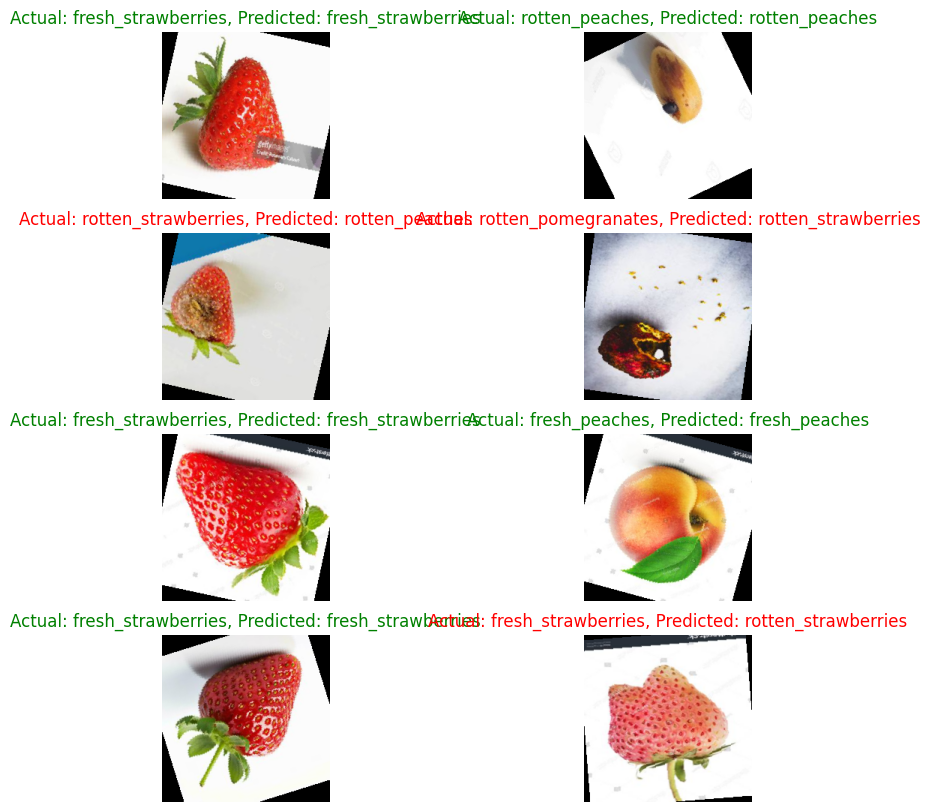

In [18]:
def display_random_predictions(model, num_epochs ,test_loader, class_labels, num_images=8, additional_text='', augmentation=''):
    load_model('./trained_models', model, number_of_epochs=num_epochs, additional_text=additional_text, augmentation=augmentation)
    # set model to evaluation mode
    model.eval()

    # get the total number of images in the test set
    total_images = len(test_loader.dataset)

    # randomly select 6 indices from the test set
    selected_indices = random.sample(range(total_images), num_images)

    images_so_far = 0
    # create a set of subplots in a grid, the first param is number of rows, the second param is the number of columns
    fig, axs = plt.subplots(num_images // 2, 2, figsize=(10, 10))

    with torch.no_grad():
        for i, data in enumerate(test_loader):
            images, labels = data
            outputs = model(images)
            _, preds = torch.max(outputs, 1)

            # images is a tensor with shape (batch_size, channels, height, width)
            # images.size()[0] is the number of images in the batch
            for j in range(images.size()[0]):
                # exit the loop when the desired number of images is reached
                if images_so_far >= num_images:
                    break

                # Check if the current index is in the randomly selected indices
                if i * test_loader.batch_size + j in selected_indices:
                    #  accesses a specific subplot in the grid of subplots
                    ax = axs[images_so_far // 2, images_so_far % 2]
                    # turns of the axis
                    ax.axis('off')
                    #  sets the title of the subplot
                    # sets the title of the subplot with actual and predicted labels
                    actual_label = class_labels[labels[j].item()]
                    predicted_label = class_labels[preds[j].item()]

                    # Set the title color based on match or mismatch
                    title_color = 'green' if actual_label == predicted_label else 'red'

                    ax.set_title(f'Actual: {actual_label}, Predicted: {predicted_label}', color=title_color)

                    # convert the image tensor to NumPy array and transpose
                    img = np.transpose(images.cpu().data[j].numpy(), (1, 2, 0))

                    # # unnormalize if normalization was applied during data loading
                    # img = img * np.array(config.MEAN) + np.array(config.STD)

                    # show the image in the subplot
                    ax.imshow(img)
                    # counting the processed images
                    images_so_far += 1

    # after all show the plot
    plt.show();


# Try the model on the testing dataset
display_random_predictions(model, NUMBER_OF_EPOCHS, test_loader, class_labels, augmentation='aug')